<a href="https://colab.research.google.com/github/gabrielamorales02/IntroMachineLearning/blob/main/Taller_Analisis_Texto_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-06-03 01:52:21--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-06-03 01:52:21--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [2]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [3]:
# Cargar el conjunto de datos (reemplazar 'ruta/del/archivo.csv' con la ruta del archivo real)
tweets = pd.read_csv('Gender_bias_spanish.csv')
tweets.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


In [4]:
tweets.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

                                            Contents       Label
0  @chumeltorres ya cabrón! sin tí se reciben las...      biased
1  ¿alguien es tan amable de ir a hacerme la comp...  non-biased
2  @jenniferduquee hahaha, si está rico, nadamas ...  non-biased
3  @evagelcot donde lo ves!!? es mi programa favo...  non-biased
4  como siempre mi tortilla triunfa mas que otros...  non-biased
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  1914 non-null   object
 1   Label     1914 non-null   object
dtypes: object(2)
memory usage: 30.0+ KB
None
Contents    0
Label       0
dtype: int64
Index(['Contents', 'Label'], dtype='object')


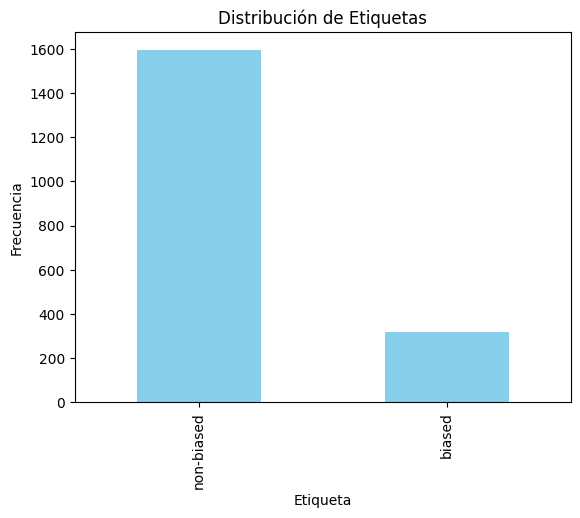

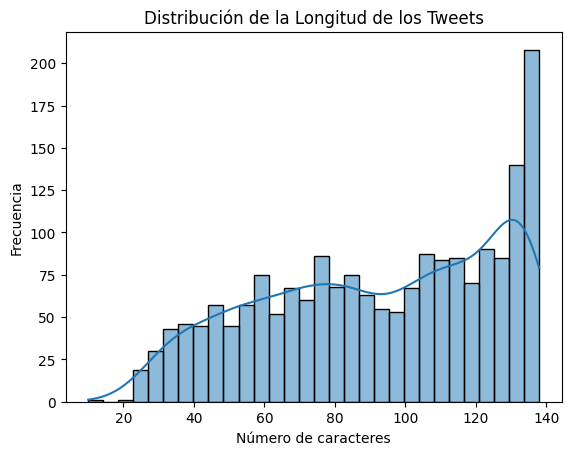

In [17]:
df = pd.read_csv("Gender_bias_spanish.csv")

print(df.head())

print(df.info())

print(df.isnull().sum())

print(df.columns)

df['Label'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribución de Etiquetas")
plt.xlabel("Etiqueta")
plt.ylabel("Frecuencia")
plt.show()

df['tweet_length'] = df['Contents'].apply(len)


sns.histplot(df['tweet_length'], bins=30, kde=True)
plt.title("Distribución de la Longitud de los Tweets")
plt.xlabel("Número de caracteres")
plt.ylabel("Frecuencia")
plt.show()

**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

La proporción de tweets "biased" y "non-biased" muestra cuántos hay de cada tipo en el conjunto de datos. Esta proporción es importante porque:

Si hay muchos más tweets de un tipo que del otro, el modelo puede aprender mal y no detectar bien los casos menos comunes.

Un desbalance puede no reflejar la realidad de los tweets en general.

Para evaluar bien el modelo, hay que usar métricas adecuadas cuando las clases están desbalanceadas.

Saber la proporción ayuda a decidir si es necesario ajustar los datos para mejorar el modelo.

Esta información da contexto a los resultados del análisis, como entender si una alta precisión es realmente buena o engañosa.



## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.


In [19]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_tweet'] = df['Contents'].apply(preprocess_text)

print(df[['Contents', 'cleaned_tweet']].head())

                                            Contents  \
0  @chumeltorres ya cabrón! sin tí se reciben las...   
1  ¿alguien es tan amable de ir a hacerme la comp...   
2  @jenniferduquee hahaha, si está rico, nadamas ...   
3  @evagelcot donde lo ves!!? es mi programa favo...   
4  como siempre mi tortilla triunfa mas que otros...   

                                       cleaned_tweet  
0  chumeltorres cabrn t reciben noticias colchonc...  
1  alguien tan amable ir hacerme compra maana baj...  
2  jenniferduquee hahaha si est rico nadamas falt...  
3  evagelcot ves programa favorito slo encuentro ...  
4  siempre tortilla triunfa mas platos playa http...  


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


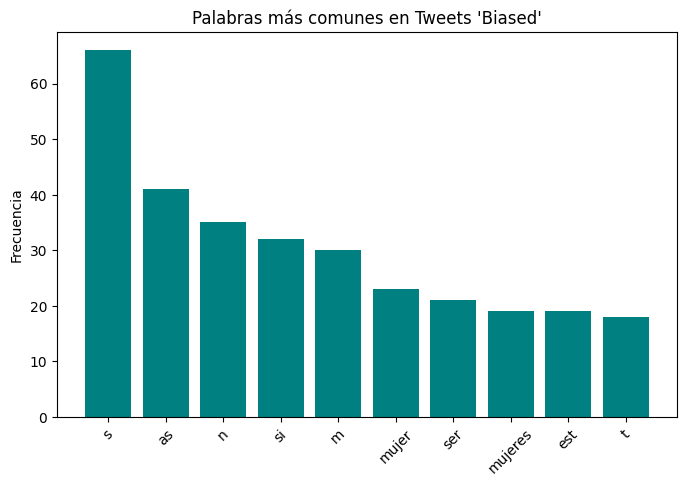

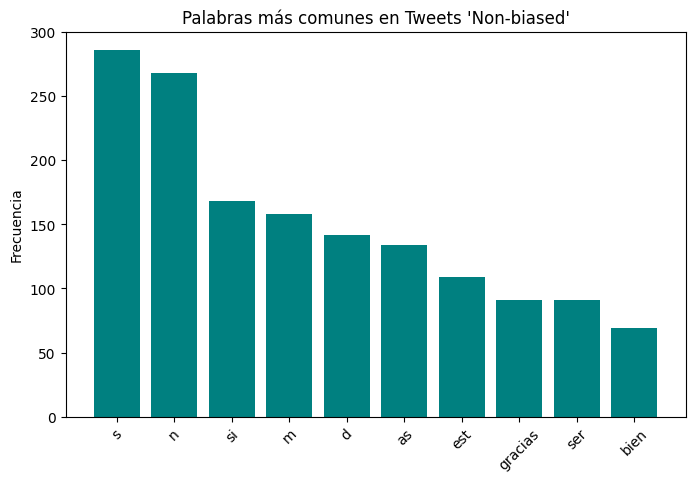

In [36]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^a-z0-9\s]', ' ', texto)
    texto = texto.translate(str.maketrans('', '', string.punctuation))
    palabras = texto.split()
    palabras = [p for p in palabras if p not in stop_words]
    return palabras

biased_tweets = df[df['Label'] == 'biased']['Contents']
biased_words = Counter()
for tweet in biased_tweets:
    biased_words.update(limpiar_texto(tweet))

non_biased_tweets = df[df['Label'] == 'non-biased']['Contents']
non_biased_words = Counter()
for tweet in non_biased_tweets:
    non_biased_words.update(limpiar_texto(tweet))

import matplotlib.pyplot as plt

def graficar_frecuencias(counter, titulo):
    palabras, frecuencias = zip(*counter.most_common(10))
    plt.figure(figsize=(8,5))
    plt.bar(palabras, frecuencias, color='teal')
    plt.title(titulo)
    plt.xticks(rotation=45)
    plt.ylabel('Frecuencia')
    plt.show()

graficar_frecuencias(biased_words, "Palabras más comunes en Tweets 'Biased'")
graficar_frecuencias(non_biased_words, "Palabras más comunes en Tweets 'Non-biased'")

**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

1. Los tweets etiquetados como 'biased' suelen contener palabras relacionadas con estereotipos, opiniones fuertes o juicios, como “mujer”, “hombre”, “debería” o “nunca”, que pueden reforzar ideas preconcebidas o discriminatorias. En cambio, los 'non-biased' tienden a usar un lenguaje más neutro, con palabras como “hacer”, “personas” o “trabajo”, sin carga emocional. Al comparar ambos grupos, se puede identificar el tipo de sesgo presente, ya que ciertas palabras aparecen con más frecuencia en los tweets con sesgo y casi nada en los que no lo tienen. Estas diferencias revelan qué prejuicios están presentes y cómo se expresan.

2. Al analizar las palabras más comunes en los tweets marcados como 'biased', es posible detectar términos que reflejan sesgo. Aunque el conteo de palabras no muestra el contexto exacto, sí revela patrones: por ejemplo, el uso frecuente de palabras como “siempre”, “nunca”, “todos” o “ninguno” junto con grupos específicos como “mujeres” o “hombres” puede indicar generalizaciones o prejuicios. También es común encontrar términos negativos o despectivos. Para confirmar el sesgo con más certeza, se necesitaría un análisis más profundo del contexto y el sentimiento, pero la frecuencia de ciertas palabras ya es una señal clara de posibles sesgos.

3. Para entender mejor las opiniones sesgadas, las empresas podrían:

Identificar patrones de sesgo: Analiza temas y palabras clave frecuentes en los datos para identificar cómo se manifiesta el sesgo.
Monitorear activamente: Usa esas palabras clave para seguir conversaciones en tiempo real en redes sociales y otras plataformas.
Mejorar la comunicación interna y externa: Desarrolla guías de estilo para evitar lenguaje sesgado en todas las comunicaciones.
Automatizar la detección: Entrena modelos de machine learning para identificar automáticamente contenido sesgado en grandes volúmenes de texto.
Fortalecer iniciativas de D&I: Obtén información concreta para mejorar las estrategias de diversidad e inclusión de la empresa.
Capacitar al personal: Entrena a los equipos para reconocer y responder adecuadamente a comentarios sesgados, especialmente en atención al cliente.
Evaluar campañas de marketing: Mide el impacto del lenguaje en la discusión online relacionada con tus campañas para asegurar un discurso inclusivo.
Analizar a la competencia: Observa el lenguaje de la competencia para informar tu propia estrategia de marca y competitividad


















## 5. Análisis de Sentimientos
Usaremos `TextBlob` para calcular el sentimiento de cada tweet y luego compararemos la distribución de sentimientos entre tweets 'biased' y 'non-biased'.

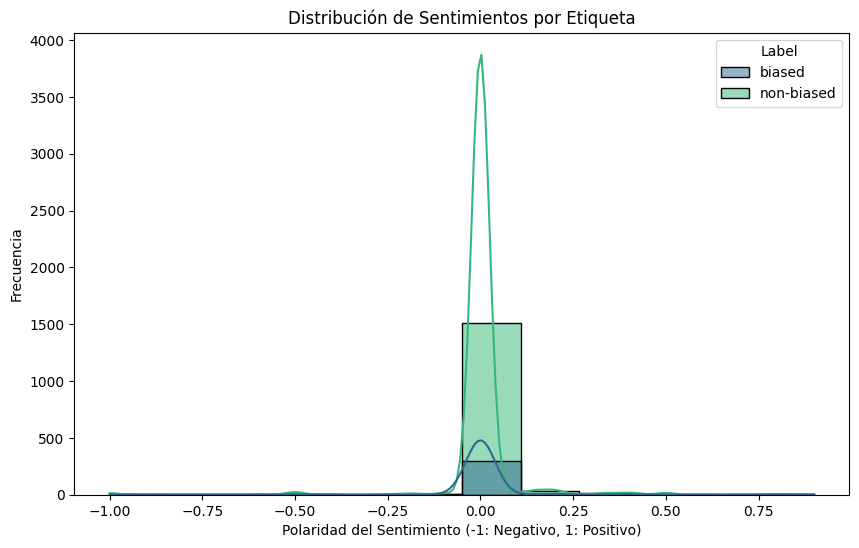

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['sentiment'] = df['cleaned_tweet'].apply(get_sentiment)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sentiment', hue='Label', kde=True, palette='viridis')
plt.title('Distribución de Sentimientos por Etiqueta')
plt.xlabel('Polaridad del Sentimiento (-1: Negativo, 1: Positivo)')
plt.ylabel('Frecuencia')
plt.show()

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

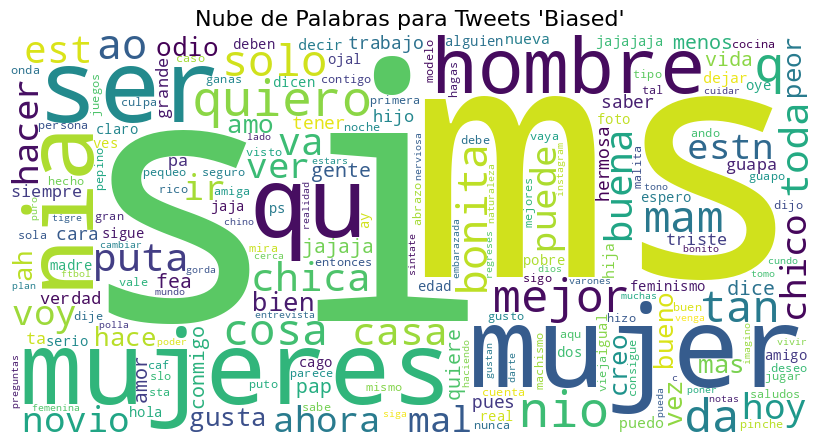

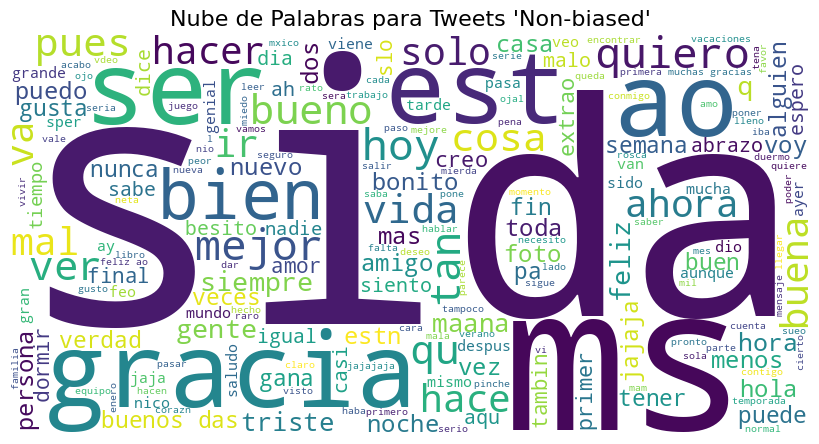

In [40]:
import matplotlib.pyplot as plt
def crear_nube_palabras(texto, titulo):
    wordcloud = WordCloud(width = 800, height = 400,
                          background_color ='white',
                          stopwords = stop_words,
                          min_font_size = 10).generate(texto)

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(titulo, fontsize=16)
    plt.show()

texto_biased = " ".join(df[df['Label'] == 'biased']['cleaned_tweet'])
texto_non_biased = " ".join(df[df['Label'] == 'non-biased']['cleaned_tweet'])

crear_nube_palabras(texto_biased, "Nube de Palabras para Tweets 'Biased'")
crear_nube_palabras(texto_non_biased, "Nube de Palabras para Tweets 'Non-biased'")

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

1. Este análisis te permite refinar la comunicación de tu marca al entender el sentimiento del cliente (positivo, negativo o neutral) para adaptar el tono y contenido. También te ayuda a monitorear temas clave que interesan a tu audiencia, lo que informa la creación de contenido relevante. Al prevenir crisis de reputación detectando rápidamente el sentimiento negativo o palabras problemáticas, puedes actuar proactivamente. Además, te permite personalizar la comunicación basándote en el lenguaje de diferentes segmentos de clientes y optimizar el servicio al cliente al identificar problemas comunes y mejorar tus respuestas.

2. Si una campaña genera tweets predominantemente "biased" (sesgados), el primer paso es revisar el lenguaje de la campaña para identificar y corregir cualquier estereotipo o exclusión involuntaria. Dependiendo de la severidad, podría ser necesario emitir una disculpa o aclaración pública para reafirmar los valores de inclusión de la marca. También se podría considerar educar a la audiencia mediante contenido que promueva la diversidad, o segmentar y reorientar la audiencia para enfocar el mensaje donde sea mejor recibido. Finalmente, colaborar con voces inclusivas puede ayudar a contrarrestar la percepción de sesgo y es crucial monitorear continuamente para asegurar que los ajustes sean efectivos.

3. En un análisis futuro, sería valioso explorar tendencias de sentimiento para ver cómo evoluciona la percepción de la marca a lo largo del tiempo, lo que te permite medir el impacto de tus acciones. Rastrear cambios en el vocabulario y los temas más frecuentes puede indicar nuevas preocupaciones del cliente o tendencias culturales emergentes. Analizar fluctuaciones en el sesgo percibido te ayudará a entender si aumenta o disminuye en respuesta a eventos específicos o acciones de la marca. Otros patrones incluyen la estacionalidad (sentimientos o sesgos recurrentes en ciertas épocas), el análisis de entidades nombradas (quién o qué se asocia más con tu marca), el análisis de redes sociales (difusión de mensajes e influencers), el análisis de temas (identificar temas subyacentes) y la comparación entre plataformas para entender las diferencias en el discurso